Nama : Yolanda Ester Berliana Ritonga

Email : yolandaesterbrtg@gmail.com

Kelas : Belajar Pengembangan Machine Learning

**Import Library**

In [321]:
import tensorflow as tf
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Membaca Data**

In [322]:
data = pd.read_csv('bbc-text.csv')

In [323]:
total_data = data.shape[0]
print("Total data:", total_data)

Total data: 2225


In [324]:
data.columns

Index(['category', 'text'], dtype='object')

In [325]:
data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


**Preprocessing Data**

In [326]:
category = pd.get_dummies(data.category)

In [327]:
new_data = pd.concat([data, category], axis=1)
new_data = new_data.drop(columns='category')

**Preprocessing Teks**

In [328]:
stop_words = set(stopwords.words('english'))

In [329]:
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_sentence = [w for w in words if not w.lower() in stop_words]
    return ' '.join(filtered_sentence)

In [330]:
new_data['text'] = new_data['text'].apply(preprocess_text)

**Tokenisasi dan Padding**

In [331]:
X = new_data['text'].values
y = new_data[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [333]:
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

Jumlah data pelatihan: 1780
Jumlah data pengujian: 445


In [334]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [335]:
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [336]:
padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

**Membuat Model**

In [337]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

**Kompilasi Model**

In [338]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

**Callback dan Early Stopping**

In [339]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        target_accuracy = 0.90
        target_val_accuracy = 0.90

        current_accuracy = logs.get('accuracy', 0)
        current_val_accuracy = logs.get('val_accuracy', 0)

        if current_accuracy >= target_accuracy and current_val_accuracy >= target_val_accuracy:
            print("\n mencapai target!")
            self.model.stop_training = True

In [340]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [341]:
callbacks = [
    MyCallback(),
    early_stopping
]

**Pelatihan Model**

In [342]:
history = model.fit(
    padded_train,
    y_train,
    epochs=50,
    validation_data=(padded_test, y_test),
    verbose=2,
    callbacks=callbacks
)

Epoch 1/50
56/56 - 12s - loss: 1.5978 - accuracy: 0.2713 - val_loss: 1.5022 - val_accuracy: 0.4112 - 12s/epoch - 218ms/step
Epoch 2/50
56/56 - 8s - loss: 1.1787 - accuracy: 0.4404 - val_loss: 0.9706 - val_accuracy: 0.4944 - 8s/epoch - 150ms/step
Epoch 3/50
56/56 - 7s - loss: 0.8472 - accuracy: 0.5573 - val_loss: 0.7837 - val_accuracy: 0.5955 - 7s/epoch - 116ms/step
Epoch 4/50
56/56 - 8s - loss: 0.7026 - accuracy: 0.6438 - val_loss: 0.6702 - val_accuracy: 0.6539 - 8s/epoch - 141ms/step
Epoch 5/50
56/56 - 6s - loss: 0.4932 - accuracy: 0.7888 - val_loss: 0.4393 - val_accuracy: 0.7708 - 6s/epoch - 104ms/step
Epoch 6/50

 mencapai target!
56/56 - 7s - loss: 0.2492 - accuracy: 0.9236 - val_loss: 0.2718 - val_accuracy: 0.9101 - 7s/epoch - 121ms/step


**Akurasi**

In [343]:
train_accuracy = history.history['accuracy'][-1] * 100
val_accuracy = history.history['val_accuracy'][-1] * 100

print(f'Final Training Accuracy: {train_accuracy:.2f}%')
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')

Final Training Accuracy: 92.36%
Final Validation Accuracy: 91.01%


**Visualisasi Hasil Pelatihan**

In [344]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_accuracy) + 1)

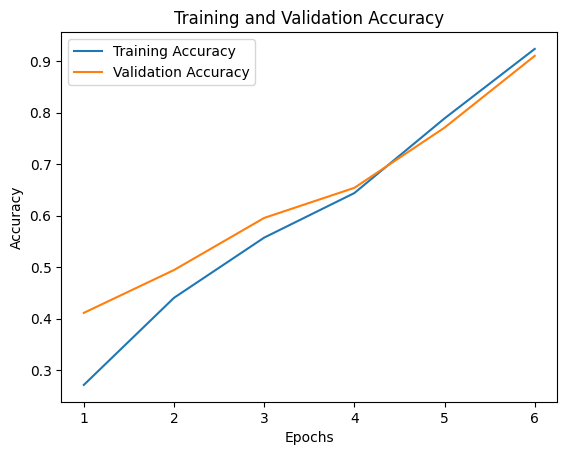

In [345]:
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

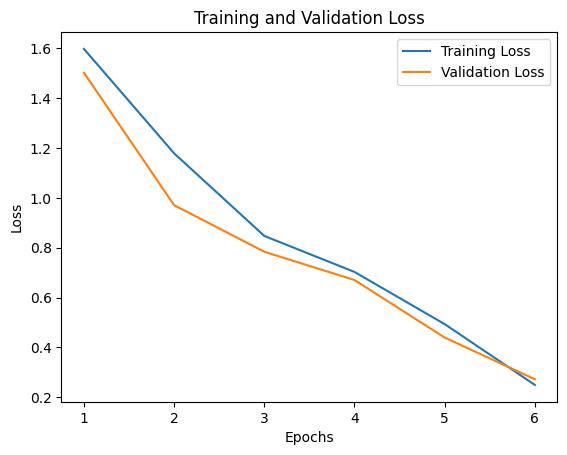

In [346]:
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()